# run_201808082230

プログラムを整理した上で50k stepまで動かしてみた。まだEM値70には届かない。原因を探る。

## TODO

* [x] プログラムの整理
* [x] 60 stepまで動かして、EMがさらに増加するか確認する
  - NLPLearn/QANetと比べて正則化の処理が抜けている部分があるためもしかしたら過学習するかもしれない
* [ ] EM精度向上
* [ ] 省メモリ化
  - GTX 1080で動かせるようにしたい
* [ ] 高速化、原因が分からないがNLPLearn/QANetと比べてスピードが劣る

---

## 結果の詳細

* commit: e3772655db772a89b2949d97e12aabc71ae0bcd3
* 前処理済データ： [preprocessed_z_with_dev_data_201808080458.tar.gz](https://s3.amazonaws.com/taiwa-eqa/qanet/preprocessed_z_with_dev_data_201808080458.tar.gz)

ハイパーパラメータ：

In [8]:
import json

with open('./logs/201808082230/hparams.json') as f:
    print(json.dumps(json.load(f), indent=2))

{
  "epochs": 100,
  "word_dropout_rate": 0.1,
  "char_conv_filter_size": 5,
  "max_context_length": 400,
  "learning_rate": 0.001,
  "num_gpus": 2,
  "dim": 128,
  "l2_regularizer_scale": 3e-07,
  "embedding_encoder_num_conv_layers": 4,
  "highway_num_layers": 2,
  "char_vocab_size": 1178,
  "ema_decay": 0.9999,
  "word_emb_dim": 300,
  "embedding_encoder_num_blocks": 1,
  "char_dim": 128,
  "char_emb_dim": 64,
  "max_grad_norm": 5.0,
  "model_encoder_num_heads": 8,
  "embedding_encoder_filter_size": 7,
  "char_dropout_rate": 0.1,
  "batch_size": 32,
  "layer_dropout_survival_prob": 0.9,
  "embedding_encoder_num_heads": 8,
  "model_encoder_num_blocks": 7,
  "max_question_length": 30,
  "max_word_length": 16,
  "dropout_rate": 0.05,
  "warmup_steps": 1000,
  "model_encoder_num_conv_layers": 2,
  "model_encoder_filter_size": 5
}


dev-v1.1.jsonに対する評価結果：

```
{"exact_match": 66.3197729422895, "f1": 77.02220532704708}
```

In [3]:
%matplotlib inline

import os
import sys

root_dir = os.path.join(os.getcwd(), "..", "../")
if root_dir not in sys.path:
    sys.path.append(root_dir)

from IPython.core.pylabtools import figsize
from plot_util import plot_perplexity

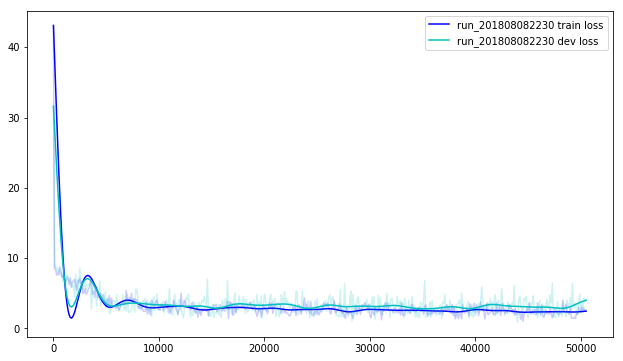

In [9]:
figsize(10.5, 6)

plot_perplexity(
    ('run_201808082230 train loss', './logs/201808082230/run_201808082230_train_loss.csv'),
    ('run_201808082230 dev loss', './logs/201808082230/run_201808082230_dev_loss.csv'),
    log=False)

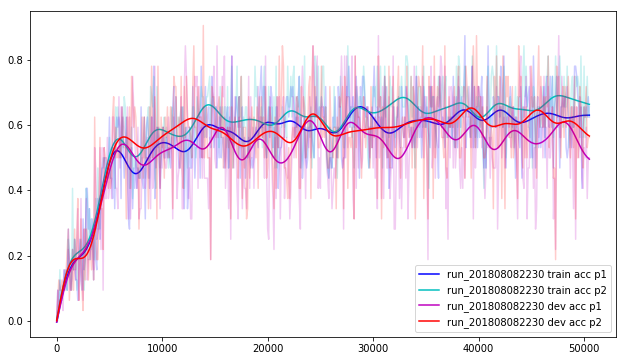

In [10]:
figsize(10.5, 6)

plot_perplexity(
    ('run_201808082230 train acc p1', './logs/201808082230/run_201808082230_train_acc_p1.csv'),
    ('run_201808082230 train acc p2', './logs/201808082230/run_201808082230_train_acc_p2.csv'),
    ('run_201808082230 dev acc p1', './logs/201808082230/run_201808082230_dev_acc_p1.csv'),
    ('run_201808082230 dev acc p2', './logs/201808082230/run_201808082230_dev_acc_p2.csv'),
    log=False)